In [3]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt  # 시각화 도구
import numpy as np  # 배열
import pandas as pd  # 데이터프레임
import sklearn.linear_model  # 선형 모델

In [4]:
oecd_bli = pd.read_csv("./oecd_bli_2015.csv", thousands=",", sep=",")  # thousands 파라미터 : 숫자 3글자당 ,로 구분되어있는 표시 없애고 파일 불러오기
gdp_per_capita = pd.read_csv("./gdp_per_capita.csv", thousands=",", sep=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [5]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [6]:
type(oecd_bli)

pandas.core.frame.DataFrame

In [7]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [8]:
type(gdp_per_capita)

pandas.core.frame.DataFrame

In [9]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [10]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [11]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [12]:
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

In [13]:
X.shape

(29, 1)

In [14]:
y.shape

(29, 1)

In [15]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [16]:
# 나라, 1인당 GDP, 삶의 만족도

In [17]:
country_stats["GDP per capita"].sort_values(ascending=True, inplace=False)

Country
Russia              9054.914
Turkey              9437.372
Hungary            12239.894
Poland             12495.334
Slovak Republic    15991.736
Estonia            17288.083
Greece             18064.288
Portugal           19121.592
Slovenia           20732.482
Spain              25864.721
Korea              27195.197
Italy              29866.581
Japan              32485.545
Israel             35343.336
New Zealand        37044.891
France             37675.006
Belgium            40106.632
Germany            40996.511
Finland            41973.988
Canada             43331.961
Netherlands        43603.115
Austria            43724.031
United Kingdom     43770.688
Sweden             49866.266
Iceland            50854.583
Australia          50961.865
Ireland            51350.744
Denmark            52114.165
United States      55805.204
Name: GDP per capita, dtype: float64

In [18]:
# United States가 1인당 GDP 지수가 제일 높음
# Russia가 1인당 GDP 지수가 제일 낮음
# 우리나라의 1인당 GDP 지수는 27195.197로 11번째임

In [19]:
data1 = country_stats["GDP per capita"].sort_values(ascending=True, inplace=False) 
data1 = pd.DataFrame(data1)
data1

,GDP per capita
Country,
Russia,9054.914
Turkey,9437.372
Hungary,12239.894
Poland,12495.334
Slovak Republic,15991.736
Estonia,17288.083
Greece,18064.288
Portugal,19121.592
Slovenia,20732.482


In [20]:
data1[data1.index == "Korea"]

,GDP per capita
Country,
Korea,27195.197


In [21]:
data1[data1.index == "Korea"].index

Index(['Korea'], dtype='object', name='Country')

In [22]:
data1["index"] = pd.DataFrame(np.arange(data1.shape[0]))  
data1

,GDP per capita,index
Country,,
Russia,9054.914,NaN
Turkey,9437.372,NaN
Hungary,12239.894,NaN
Poland,12495.334,NaN
Slovak Republic,15991.736,NaN
Estonia,17288.083,NaN
Greece,18064.288,NaN
Portugal,19121.592,NaN
Slovenia,20732.482,NaN


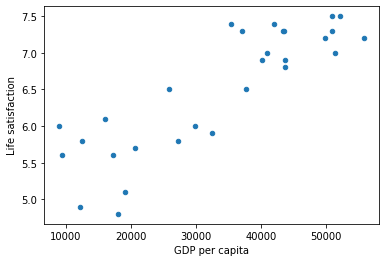

In [23]:
# 데이터 시각화
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")  # 데이터이름.plot(kind:종류, x:x축할 피쳐명, y:y축할 피쳐명)
plt.show()

In [24]:
# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

In [25]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X_new = [[22587]]  # 새로운 데이터에 대한 예측값을 구해보자.
# 선형 회귀
y_new_prediction = model.predict(X_new)
print(y_new_prediction)

[[5.96242338]]


In [27]:
# 새로운 데이터 키프로스 나라의 1인당 GDP 값이 22587인 것을 알았을 때
# 그에 대응되는 삶의 만족도는 5.96정도가 나온다.

In [28]:
model.coef_

array([[4.91154459e-05]])

In [29]:
model.intercept_

array([4.8530528])

In [30]:
# 회귀 직선을 데이터 위에 그려보자
X.min()

9054.914

In [31]:
X.max()

55805.204000000005

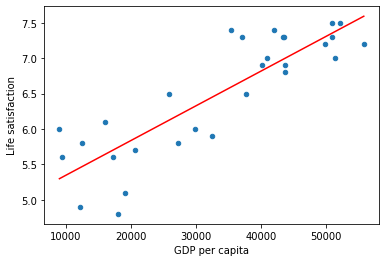

In [32]:
reg_x = np.arange(X.min(), X.max(), 1).reshape(-1,1)
reg_y = model.coef_ * reg_x + model.intercept_

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.plot(reg_x, reg_y, "r")
plt.show()

In [33]:
# 만약, 사례 기반의 학습 알고리즘을 사용한다면
# 1인당 GDP가 키프로스의 22587랑 제일 가까운 나라, 그에 해당하는 삶의 만족도를 찾는다.
# 그래서 슬로베니아(20732)의 삶의 만족도가 5.7이므로
# 키프로스의 삶의 만족도를 5.7로 예측한다.

In [34]:
# 만일 가장 가까운 두 나라를 더 고려한다면
country_stats
# Portugal, Slovenia, Spain이 제일 가까운 세 나라이다.

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [35]:
# 그럼 그 세 나라의 삶의 만족도값들의 평균을 내서 그걸 키프로스의 삶의 만족도의 예측값으로 사용한다.

In [36]:
# 이러한 알고리즘을 k-최근접 이웃 회귀(k-nearest neighbors, k-NN) 이라고 한다.
# 처음에 제일 가까운 나라 1개만 찾는 것 : k=1
# 가까운 나라 3개를 찾는 것 : k=3

In [37]:
# 위의 선형 회귀 모델을 k-최근접 이웃 회귀로 바꿔보자.
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [38]:
model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [39]:
model.predict(X_new)

array([[5.76666667]])

In [40]:
# 위의 선형회귀 모델에서의 예측값 : 5.96242338
# 지금 k=3일 때의 k-최근접 이웃 회귀 모델에서의 예측값 : 5.76666667